In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%reload_ext autoreload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from phase_retrieval import PhaseRetSolver

sns.set_context("paper")

# A circle and a line

For this case subspace A is

$$ A = \{(x1, x2, x3)  : x_1^2 + x_2^2 = 1 \text{ and } x_3 = 0 \},$$

and subspace B is
$$ B_\theta = \{(1, t cos\theta, tsin\theta) : t \in \R \} \text{ for } \theta \in \left[-\frac{\pi}{2}, \frac{\pi}{2} \right]$$

In [3]:
def point_A(t):
    return np.array([np.cos(np.pi * t), np.sin(np.pi * t), 0])


def point_B(t, theta, x_0=1):
    assert theta >= -np.pi / 2 or theta < np.pi / 2, "Theta outside of range"
    return np.array([x_0, t * np.cos(theta), t * np.sin(theta)])

In [4]:
def proj_A(point):
    proj_point = np.copy(point)
    proj_point[2] = 0
    proj_point[0:2] = proj_point[0:2] / np.linalg.norm(point[0:2])

    return proj_point


def proj_B(point, theta, x_0=1):
    proj_point = np.zeros_like(point)
    proj_point[0] = x_0
    proj_point[1] = point[1] * np.cos(theta) ** 2 + point[2] * np.cos(theta) * np.sin(
        theta
    )
    proj_point[2] = (
        point[1] * np.cos(theta) * np.sin(theta) + point[2] * np.sin(theta) ** 2
    )

    return proj_point

In [20]:
phase_ret_sol = PhaseRetSolver()


config = {"n_iter": 500000, "tol": 1e-10}

proj_A_args = ()

phase_ret_sol.set_proj_A(proj_A, proj_A_args)
phase_ret_sol.set_config_from_dict(config)

In [21]:
theta = np.pi * 1e-1
x_0 = 1.0

proj_supp_args = (theta, x_0)
phase_ret_sol.set_proj_B(proj_B, args=proj_supp_args)

init_x = np.random.randn(3) * 0.5
ref_x = np.array([1.0, 0.0, 0.0])

iter_x, res, errors = phase_ret_sol.run_diffmap_algo(init_x, ref_x, save_all=True)
iter_x_ap, res_ap, _ = phase_ret_sol.run_altproj_algo(init_x, ref_x, save_all=True)

In [22]:
theta = 0.0
x_0 = 0.8

config["n_iter"] = 1000
phase_ret_sol.set_config_from_dict(config)

proj_supp_args = (theta, x_0)
phase_ret_sol.set_proj_B(proj_B, args=proj_supp_args)

In [23]:
init_x = np.array([-0.5, 0.0, 0.0])
ref_x = np.array([0.8, np.sqrt(1.0 - 0.8**2), 0.0])

x_sad, res_sad, errors_sad = phase_ret_sol.run_diffmap_algo(
    init_x, ref_x, save_all=True
)
x_sad_ap, _, _ = phase_ret_sol.run_altproj_algo(init_x, ref_x, save_all=True)

In [24]:
init_x = np.array([-0.5, 1e-16, 0.0])
ref_x = np.array([0.8, np.sqrt(1.0 - 0.8**2), 0.0])

x_sad_pert, res_sad_pert, errors_sad_pert = phase_ret_sol.run_diffmap_algo(
    init_x, ref_x, save_all=True
)
x_sad_ap_pert, _, _ = phase_ret_sol.run_altproj_algo(init_x, ref_x, save_all=True)

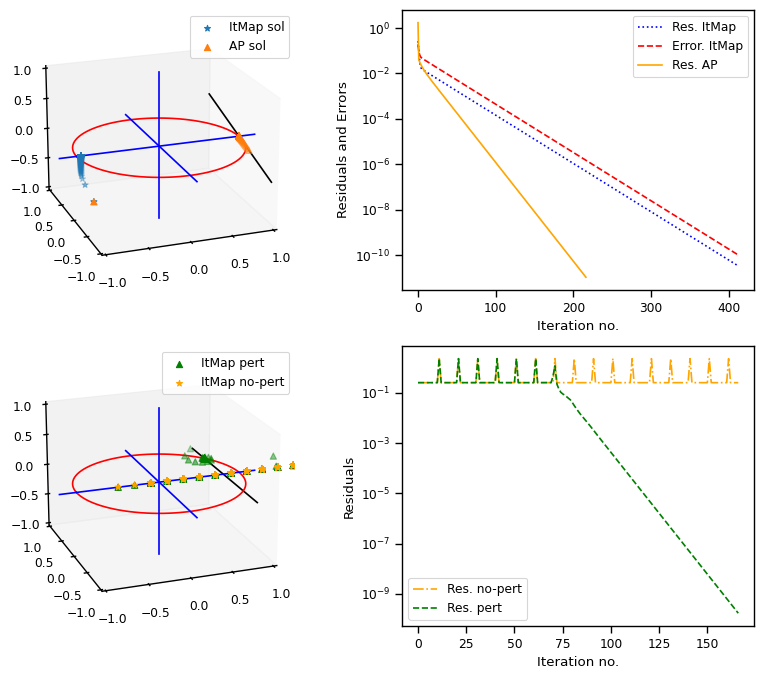

In [45]:
sns.set_context("paper")

t = np.linspace(-1, 1, 100)

points_A = np.array([point_A(tt) for tt in t])
points_B = np.array([point_B(tt, np.pi / 10, 1) for tt in t])

fig = plt.figure(figsize=(10, 8))
ax11 = fig.add_subplot(221, projection="3d")
ax12 = fig.add_subplot(222)

ax11.plot(points_B[:, 0], points_B[:, 1], points_B[:, 2], color="black")
ax11.plot(points_A[:, 0], points_A[:, 1], points_A[:, 2], color="red")

ax11.scatter(iter_x[:, 0], iter_x[:, 1], iter_x[:, 2], marker="*", label="ItMap sol")
ax11.scatter(
    iter_x_ap[:, 0], iter_x_ap[:, 1], iter_x_ap[:, 2], marker="^", label="AP sol"
)

ax11.view_init(20, 250)
ax11.plot(np.zeros(10), np.linspace(-1.2, 1.2, 10), np.zeros(10), color="blue")
ax11.plot(np.zeros(10), np.zeros(10), np.linspace(-1.2, 1.2, 10), color="blue")
ax11.plot(np.linspace(-1.2, 1.2, 10), np.zeros(10), np.zeros(10), color="blue")

ax11.set_xlim(-1, 1)
ax11.set_ylim(-1, 1)
ax11.set_zlim(-1, 1)

ax11.set_xticks(np.arange(-1, 1.5, 0.5))
ax11.set_yticks(np.arange(-1, 1.5, 0.5))
ax11.set_zticks(np.arange(-1, 1.5, 0.5))

ax11.legend()
ax11.grid(False)

ax12.plot(res, ls=":", color="blue", label="Res. ItMap")
ax12.plot(errors, ls="--", color="red", label="Error. ItMap")
ax12.plot(res_ap, color="orange", label="Res. AP")
ax12.set_yscale("log")
ax12.set_ylabel("Residuals and Errors")
ax12.set_xlabel("Iteration no.")

ax12.legend()

################################################################

points_B = np.array([point_B(tt, 0.0, 0.8) for tt in t])

ax12 = fig.add_subplot(223, projection="3d")
ax22 = fig.add_subplot(224)

ax12.plot(points_B[:, 0], points_B[:, 1], points_B[:, 2], color="black")
ax12.plot(points_A[:, 0], points_A[:, 1], points_A[:, 2], color="red")

ax12.scatter(
    x_sad_pert[:, 0],
    x_sad_pert[:, 1],
    x_sad_pert[:, 2],
    marker="^",
    color="green",
    label="ItMap pert",
)
ax12.scatter(
    x_sad[:, 0],
    x_sad[:, 1],
    x_sad[:, 2],
    marker="*",
    color="orange",
    label="ItMap no-pert",
)
# ax12.scatter(iter_x_ap[:, 0], iter_x_ap[:, 1], iter_x_ap[:, 2], marker="^")

ax12.view_init(20, 250)
ax12.plot(np.zeros(10), np.linspace(-1.2, 1.2, 10), np.zeros(10), color="blue")
ax12.plot(np.zeros(10), np.zeros(10), np.linspace(-1.2, 1.2, 10), color="blue")
ax12.plot(np.linspace(-1.2, 1.2, 10), np.zeros(10), np.zeros(10), color="blue")

ax12.set_xlim(-1, 1)
ax12.set_ylim(-1, 1)
ax12.set_zlim(-1, 1)

ax12.set_xticks(np.arange(-1, 1.5, 0.5))
ax12.set_yticks(np.arange(-1, 1.5, 0.5))
ax12.set_zticks(np.arange(-1, 1.5, 0.5))

ax12.legend()
ax12.grid(False)

# ax22.hist(res_sad, color="red", label="Residuals")
ax22.plot(
    res_sad[: res_sad_pert.shape[0]], color="orange", ls="-.", label="Res. no-pert"
)
ax22.plot(res_sad_pert, ls="--", color="green", label="Res. pert")
ax22.set_yscale("log")

ax22.legend()

ax22.set_ylabel("Residuals")
ax22.set_xlabel("Iteration no.")

plt.savefig("toymodel1.pdf", bbox_inches="tight")

In [ ]:
def proj_A(f0, exp_data):
    f1 = np.fft.fftn(f0)
    f1 = exp_data * np.exp(1j * np.angle(f1))
    f1 = np.fft.ifftn(f1).real

    return f1


def proj_supp(f0, support_mask):
    f2 = f0 * support_mask
    return f2